In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [48]:
df_comments = pd.read_csv('comments.csv')
df_comments.head()

,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [49]:
# Rename the columns
df_comments = df_comments.rename(columns={
    'id': 'comment_id',
    'comment': 'comment_text',
    'User id': 'user_id',
    'Photo id': 'photo_id',
    'created Timestamp': 'timestamp_created',
    'posted date': 'date_posted',
    'emoji used': 'emoji_used',
    'Hashtags used count': 'hashtags_count'
})

# Drop unwanted columns
columns_to_drop = ['photo_id', 'timestamp_created', 'date_posted']
df_comments = df_comments.drop(columns=columns_to_drop)

# Drop empty rows
df_comments.dropna(inplace=True)

df_comments.head()

,comment_id,comment_text,User id,emoji_used,hashtags_count
0,1,unde at dolorem,2,yes,1
1,2,quae ea ducimus,3,no,2
2,3,alias a voluptatum,5,no,4
3,4,facere suscipit sunt,14,yes,2
4,5,totam eligendi quaerat,17,yes,1


In [50]:
df_follows = pd.read_csv('follows.csv')
df_follows.head()

,follower,followee,created time,is follower active,followee Acc status
0,2,1,13-04-2023 08:04,1,Private
1,2,3,13-04-2023 08:04,0,private
2,2,4,13-04-2023 08:04,0,public
3,2,5,13-04-2023 08:04,0,private
4,2,6,13-04-2023 08:04,1,private


In [51]:
# Rename the columns
df_follows = df_follows.rename(columns={
    'created time': 'timestamp_created',
    'is follower active': 'is_follower_active',
    'followee Acc status': 'followee_account_status'
})

# Drop unwanted columns
columns_to_drop = ['timestamp_created', 'is_follower_active']
df_follows = df_follows.drop(columns=columns_to_drop)

# Drop empty rows
df_follows.dropna(inplace=True)

df_follows.head()

,follower,followee,followee_account_status
0,2,1,Private
1,2,3,private
2,2,4,public
3,2,5,private
4,2,6,private


In [52]:
df_likes = pd.read_csv('likes.csv')
df_likes.head()

,user,photo,created time,following or not,like type
0,2,1,13-04-2023 08:04,yes,heart emoji
1,2,4,13-04-2023 08:04,no,thumbs up
2,2,8,13-04-2023 08:04,yes,laughing
3,2,9,13-04-2023 08:04,no,fire
4,2,10,13-04-2023 08:04,yes,clap


In [53]:
# Rename the columns
df_likes = df_likes.rename(columns={
    'created time': 'timestamp_created',
    'following or not': 'is_following',
    'like type': 'like_type'
})

# Drop unwanted columns
columns_to_drop = ['is_following']
df_likes = df_likes.drop(columns=columns_to_drop)

# Drop empty rows
df_likes.dropna(inplace=True)

df_likes.head()

,user,photo,timestamp_created,like_type
0,2,1,13-04-2023 08:04,heart emoji
1,2,4,13-04-2023 08:04,thumbs up
2,2,8,13-04-2023 08:04,laughing
3,2,9,13-04-2023 08:04,fire
4,2,10,13-04-2023 08:04,clap


In [54]:
df_photo_tags = pd.read_csv('photo_tags.csv')

# Drop empty rows
df_photo_tags.dropna(inplace=True)

df_photo_tags.head()

,photo,tag ID,user id
0,1,13,1
1,1,17,1
2,1,18,2
3,1,19,2
4,1,21,3


In [55]:
df_photos = pd.read_csv('photos.csv')

# Drop empty rows
df_photos.dropna(inplace=True)

df_photos.head()

,id,image link,user ID,created dat,Insta filter used,photo type
0,1,http://elijah.biz,1,13-04-2023 08:04,yes,photo
1,2,https://shanon.org,1,13-04-2023 08:04,no,photo
2,3,http://vicky.biz,1,13-04-2023 08:04,no,photo
3,4,http://oleta.net,1,13-04-2023 08:04,no,photo
4,5,https://jennings.biz,1,13-04-2023 08:04,yes,photo


In [56]:
df_users = pd.read_csv('users.csv')
df_users.head()

,id,name,created time,private/public,post count,Verified status
0,1,Kenton_Kirlin,16-02-2017 18:22,yes,11,no
1,2,Andre_Purdy85,02-04-2017 17:11,no,7,no
2,3,Harley_Lind18,21-02-2017 11:12,no,2,no
3,4,Arely_Bogan63,13-08-2016 01:28,yes,1,no
4,5,Aniya_Hackett,07-12-2016 01:04,yes,3,no


In [57]:
# Rename the columns
df_users = df_users.rename(columns={
    'id': 'user_id',
    'name': 'user_name',
    'created time': 'created_time',
    'private/public': 'private_public',
    'post count': 'post_count',
    'Verified status': 'verified_status'
})

# Drop empty rows
df_users.dropna(inplace=True)

df_users.head()

,user_id,user_name,created_time,private_public,post_count,verified_status
0,1,Kenton_Kirlin,16-02-2017 18:22,yes,11,no
1,2,Andre_Purdy85,02-04-2017 17:11,no,7,no
2,3,Harley_Lind18,21-02-2017 11:12,no,2,no
3,4,Arely_Bogan63,13-08-2016 01:28,yes,1,no
4,5,Aniya_Hackett,07-12-2016 01:04,yes,3,no


In [58]:
# 5 oldest users
# Convert 'created time' column to datetime
df_users['created_time'] = pd.to_datetime(df_users['created_time'])

# Find the 5 oldest users
oldest_users = df_users.nsmallest(1, 'created_time')

# Print the result
print(oldest_users)

    user_id    user_name        created_time private_public  post_count  \
65       66  Mike.Auer39 2016-01-07 17:36:00             no          12   

   verified_status  
65              no  


In [59]:
# What day of the week do most users register on? 
# We need to figure out when to schedule an ad campgain

# Extract the day of the week from 'created time' column
df_users['day_of_week'] = df_users['created_time'].dt.day_name()

# Count the number of registrations for each day
registration_counts = df_users['day_of_week'].value_counts()

# Find the day with the highest number of registrations
most_common_day = registration_counts.idxmax()

# Print the result
print("The day with the most user registrations is:", most_common_day)

The day with the most user registrations is: Thursday


In [60]:
# We want to target our inactive users with an email campaign. Find the users who have never posted a photo.

# Filter users who have never posted a photo
inactive_users = df_users[df_users['post_count'] == 0]

# Print the inactive users
print("Users who have never posted a photo:")
print(inactive_users)

Users who have never posted a photo:
    user_id         user_name        created_time private_public  post_count  \
29       30            Kaley9 2016-09-23 21:24:00             no           0   
41       42      Maya.Farrell 2016-11-12 18:04:00             no           0   
78       79  Katarina.Dibbert 2016-03-11 13:14:00             no           0   
93       94           Damon35 2016-10-31 14:44:00             no           0   

   verified_status day_of_week  
29              no      Friday  
41              no    Saturday  
78              no      Friday  
93             yes      Monday  


In [61]:
# We're running a new contest to see who can get the most likes on a single photo. WHO WON?

# Merge df_likes with df_photos
merged_likes_photos = df_likes.merge(df_photos, left_on='photo', right_on='id')

# Group by photo and calculate sum of likes
likes_count = merged_likes_photos.groupby('photo').size()

# Find the photo with the highest number of likes
winning_photo = likes_count.idxmax()

# Get the user ID associated with the winning photo
winning_user_id = merged_likes_photos.loc[merged_likes_photos['photo'] == winning_photo, 'user ID'].iloc[0]

# Find the user name of the winner from df_users
winner = df_users.loc[df_users['user_id'] == winning_user_id, 'user_name'].iloc[0]

# Print the winner
print("The winner of the contest with the most likes on a single photo is:", winner)

The winner of the contest with the most likes on a single photo is: Zack_Kemmer93


In [62]:
# Our Investors want to know...How many times does the average user post? (total number of photos/total number of users)

# Calculate the total number of photos
total_photos = len(df_photos)

# Calculate the total number of users
total_users = len(df_users)

# Calculate the average number of posts per user
average_posts_per_user = total_photos / total_users if total_users != 0 else 0

# Calculate the number of non-posting users
non_posting_users = total_users - total_photos

# Print the average number of posts per user
print("The average number of posts per user is:", average_posts_per_user)

The average number of posts per user is: 2.57


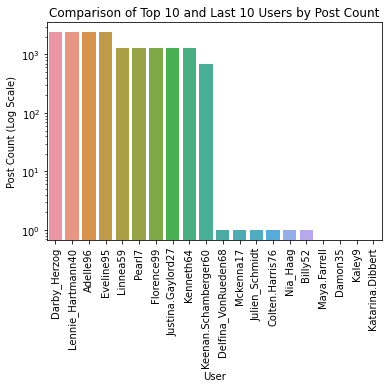

Comparison Table:
    Rank             user_name  post_count
79     1          Darby_Herzog        2400
34     2     Lennie_Hartmann40        2400
64     3              Adelle96        2400
22     4             Eveline95        2400
52     5              Linnea59        1293
33     6                Pearl7        1293
63     7            Florence99        1293
10     8     Justina.Gaylord27        1293
21     9             Kenneth64        1293
95    10  Keenan.Schamberger60         687
85    11   Delfina_VonRueden68           1
40    12             Mckenna17           1
56    13        Julien_Schmidt           1
77    14       Colten.Harris76           1
70    15              Nia_Haag           1
14    16               Billy52           1
41    17          Maya.Farrell           0
93    18               Damon35           0
29    19                Kaley9           0
78    20      Katarina.Dibbert           0


In [63]:
# User ranking by postings higher to lower

# Sort the DataFrame by post count in descending order
df_users_sorted = df_users.sort_values(by='post_count', ascending=False)

# Select the top 10 users
top_10 = df_users_sorted.head(10)

# Select the last 10 users
last_10 = df_users_sorted.tail(10)

# Combine the top 10 and last 10 users
combined_users = pd.concat([top_10, last_10])

# Generate the chart using seaborn with a logarithmic scale on the y-axis
sns.barplot(x='user_name', y='post_count', data=combined_users)
plt.xlabel('User')
plt.ylabel('Post Count (Log Scale)')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.title('Comparison of Top 10 and Last 10 Users by Post Count')
plt.xticks(rotation=90)
plt.show()

# Print the comparison table with ranks
comparison_table = pd.concat([top_10, last_10])
comparison_table['Rank'] = range(1, len(comparison_table) + 1)
comparison_table = comparison_table[['Rank', 'user_name', 'post_count']]

print("Comparison Table:")
print(comparison_table)

In [64]:
# Total Posts by Users

# Group the photos DataFrame by 'user ID' and count the number of posts
user_post_counts = df_photos.groupby('user ID')['id'].count().reset_index()

# Rename the columns for clarity
user_post_counts.columns = ['user_id', 'post_count']

# Merge with the users DataFrame to include user names
user_post_counts = user_post_counts.merge(df_users[['user_id', 'user_name']], on='user_id', how='left')

# Sort the DataFrame by post_count in descending order
user_post_counts = user_post_counts.sort_values('post_count', ascending=False)

# Print the total posts by users
print("Total Posts by Users:")
print(user_post_counts)

Total Posts by Users:
    user_id  post_count            user_name
18       23          12            Eveline95
64       88          11              Clint27
44       59          10              Cesar93
62       86           9  Delfina_VonRueden68
22       29           8              Jaime53
..      ...         ...                  ...
42       56           1         Peter.Stehr0
55       73           1         Jaylan.Lakin
53       70           1               Erick5
52       69           1         Karley_Bosco
37       48           1      Granville_Kutch

[74 rows x 3 columns]


In [65]:
# Total numbers of users who have posted at least one time

# Count the unique users who have posted at least once
total_users_posted = df_photos['user ID'].nunique()

# Print the total number of users who have posted at least once
print("Total Users Who Have Posted at Least Once:", total_users_posted)

Total Users Who Have Posted at Least Once: 74


In [66]:
# A brand wants to know which hashtags to use in a post. What are the top 5 most commonly used hashtags?

# Convert the 'hashtags_count' column to string
df_comments['hashtags_count'] = df_comments['hashtags_count'].astype(str)

# Combine all the hashtags from the 'df_comments' DataFrame
all_hashtags = ' '.join(df_comments['hashtags_count'])

# Split the combined hashtags into individual hashtags
individual_hashtags = all_hashtags.split()

# Count the occurrences of each hashtag
hashtag_counts = pd.Series(individual_hashtags).value_counts()

# Get the top 5 most commonly used hashtags
top_5_hashtags = hashtag_counts.head(5)

# Print the top 5 most commonly used hashtags
print("Top 5 Most Commonly Used Hashtags:")
print(top_5_hashtags)

# Print all the hashtags
print("\nAll Hashtags:")
print(hashtag_counts)

Top 5 Most Commonly Used Hashtags:
2    2496
1    1872
0     624
6     624
4     624
dtype: int64

All Hashtags:
2    2496
1    1872
0     624
6     624
4     624
5     624
3     624
dtype: int64


In [67]:
df_likes.head()

,user,photo,timestamp_created,like_type
0,2,1,13-04-2023 08:04,heart emoji
1,2,4,13-04-2023 08:04,thumbs up
2,2,8,13-04-2023 08:04,laughing
3,2,9,13-04-2023 08:04,fire
4,2,10,13-04-2023 08:04,clap


In [86]:
# We have a small problem with bots on our site. Find users who have liked every single photo on the site

# Count the number of unique photos liked by each user
users_likes_count = df_likes.groupby('user')['photo_id'].nunique().reset_index()

# Find the total number of photos on the site
total_photos = df_likes['photo_id'].nunique()

# Find the users who have liked every single photo
users_liked_all_photos = users_likes_count[users_likes_count['photo_id'] == total_photos]['user'].tolist()

# Print the result with user id and user name
print("Users who have liked every single photo:")
users_info = df_users[df_users['user_id'].isin(users_liked_all_photos)][['user_id', 'user_name']]
print(users_info)

Users who have liked every single photo:
    user_id           user_name
4         5       Aniya_Hackett
13       14            Jaclyn81
20       21             Rocio33
23       24   Maxwell.Halvorson
35       36      Ollie_Ledner37
40       41           Mckenna17
53       54             Duane60
56       57      Julien_Schmidt
65       66         Mike.Auer39
70       71            Nia_Haag
74       75            Leslie67
75       76  Janelle.Nikolaus81
90       91           Bethany20


In [88]:
print("Column names in df_users:")
print(df_users.columns)

print("Column names in df_comments:")
print(df_comments.columns)

Column names in df_users:
Index(['user_id', 'user_name', 'created_time', 'private_public', 'post_count',
       'verified_status', 'day_of_week'],
      dtype='object')
Column names in df_comments:
Index(['comment_id', 'comment_text', 'User  id', 'emoji_used',
       'hashtags_count'],
      dtype='object')


In [89]:
# We also have a problem with celebrities. Find users who have never commented on a photo

# Rename the column 'User  id' to 'user_id' in the df_comments dataframe
df_comments.rename(columns={'User  id': 'user_id'}, inplace=True)

# Merge the df_users and df_comments dataframes on the 'user_id' column using a left join
merged_df = pd.merge(df_users, df_comments, on='user_id', how='left')

# Identify the users who have commented on a photo by checking for non-null values in the 'comment_id' column
commented_users = merged_df[~merged_df['comment_id'].isna()]
commented_user_ids = commented_users['user_id'].unique()

# Find the users who have never commented on a photo by filtering out the commented user IDs from the df_users dataframe
users_without_comments = df_users[~df_users['user_id'].isin(commented_user_ids)]

# Print the users who have never commented on a photo
print("Users who have never commented on a photo:")
print(users_without_comments[['user_id', 'user_name']].values.tolist())


Users who have never commented on a photo:
[[1, 'Kenton_Kirlin'], [7, 'Kasandra_Homenick'], [23, 'Eveline95'], [25, 'Tierra.Trantow'], [29, 'Jaime53'], [34, 'Pearl7'], [45, 'David.Osinski47'], [49, 'Morgan.Kassulke'], [51, 'Mariano_Koch3'], [53, 'Linnea59'], [58, 'Aurelie71'], [59, 'Cesar93'], [64, 'Florence99'], [68, 'Franco_Keebler64'], [74, 'Hulda.Macejkovic'], [77, 'Donald.Fritsch'], [80, 'Darby_Herzog'], [81, 'Esther.Zulauf61'], [83, 'Bartholome.Bernhard'], [86, 'Delfina_VonRueden68'], [88, 'Clint27'], [89, 'Jessyca_West'], [90, 'Esmeralda.Mraz57']]


Percentage of users without comments: 23.0
Percentage of users who have commented on every photo: 13.0
Percentage of users who have either never commented or have commented on every photo: 36.0


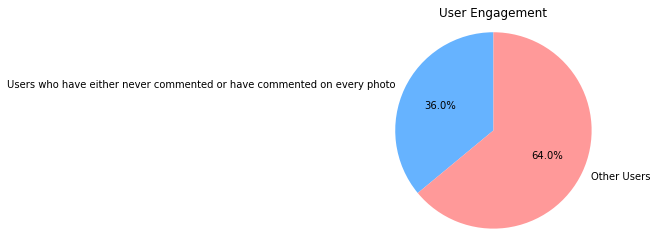

In [95]:
# Count the number of unique users who have commented on each photo
users_comments_count = df_comments['user_id'].value_counts()

# Find the number of users who have never commented on any photo
num_users_without_comments = len(df_users) - len(users_comments_count)

# Count the number of unique photos on the site
total_photos = df_photos['id'].nunique()

# Count the number of unique users who have commented on each photo
users_comments_count = df_comments.groupby('user_id').size()

# Find the number of users who have commented on every photo
num_users_commented_every_photo = len(users_comments_count[users_comments_count == total_photos])

# Calculate the percentage of users who have never commented on a photo
percentage_without_comments = (num_users_without_comments / len(df_users)) * 100

# Calculate the percentage of users who have commented on every photo
percentage_commented_every_photo = (num_users_commented_every_photo / len(df_users)) * 100

# Calculate the percentage of users who have either never commented or have commented on every photo
percentage_either_or = ((num_users_without_comments + num_users_commented_every_photo) / len(df_users)) * 100

# Print the results
print("Percentage of users without comments:", percentage_without_comments)
print("Percentage of users who have commented on every photo:", percentage_commented_every_photo)
print("Percentage of users who have either never commented or have commented on every photo:", percentage_either_or)

# Calculate the percentage of users who have neither commented nor commented on every photo
percentage_without_comments = (num_users_without_comments / len(df_users)) * 100
percentage_commented_every_photo = (num_users_commented_every_photo / len(df_users)) * 100
percentage_other_users = 100 - (percentage_without_comments + percentage_commented_every_photo)

# Create labels and sizes for the pie chart
labels = ['Users who have either never commented or have commented on every photo', 'Other Users']
sizes = [percentage_either_or, percentage_other_users]

# Set colors for the pie chart
colors = ['#66b3ff', '#ff9999']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('User Engagement')

# Set aspect ratio to make the pie chart a circle
plt.axis('equal')

# Display the pie chart
plt.show()